# 🛰️ Spaceship Titanic Classification Challenge (Kaggle)
This notebook aims to solve the Spaceship Titanic Kaggle challenge by:
- Performing data preprocessing and EDA
- Building and training multiple ML models
- Evaluating model performance using accuracy, precision, recall, F1-score, and confusion matrix
- Generating a submission file for Kaggle


# **1. Import Required Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


#  **2. Load the Dataset**
Load training and test datasets from the Kaggle Spaceship Titanic competition.


In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
train.head()


Train Shape: (8693, 14)
Test Shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## **Heatmap on missing value**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


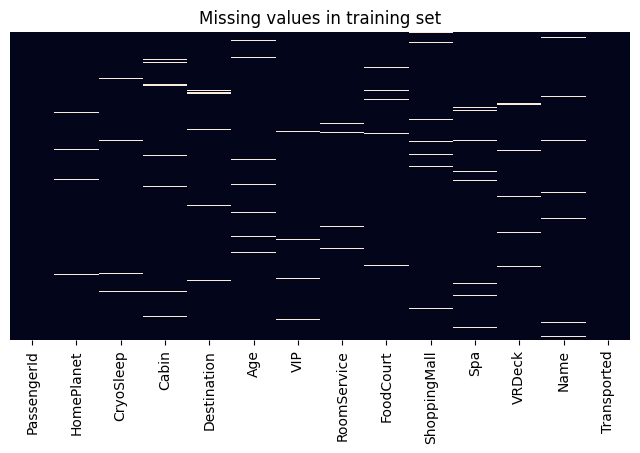

In [ ]:
# 1) Missingness heatmap
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing values in training set")
plt.show()

# **3. Data Preprocessing**
We will:
- Drop irrelevant columns (`Name`, `Cabin`)
- Handle missing values
- Encode categorical variables using one-hot encoding
- Convert the target variable `Transported` to binary


In [ ]:
# Backup Passenger IDs for submission
test_ids = test["PassengerId"]

# Drop columns not useful for modeling
train = train.drop(["Name", "Cabin", "PassengerId"], axis=1)
test = test.drop(["Name", "Cabin", "PassengerId"], axis=1)

# Fill missing values
for col in train.columns:
    if train[col].dtype == "object":
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

for col in test.columns:
    if col != 'Transported': # Exclude the target variable which is not in the test set
        if test[col].dtype == "object":
            test[col] = test[col].fillna(test[col].mode()[0])
        else:
            test[col] = test[col].fillna(test[col].median())

# Infer object types to remove downcasting warnings
train = train.infer_objects(copy=False)
test = test.infer_objects(copy=False)

# Encode target
train["Transported"] = train["Transported"].astype(bool).astype(int)

# One-hot encoding
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Align train and test sets
X = train.drop("Transported", axis=1)
y = train["Transported"]
X, test = X.align(test, join="left", axis=1, fill_value=0)

/tmp/ipython-input-12-3117666892.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(train[col].mode()[0])
/tmp/ipython-input-12-3117666892.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(test[col].mode()[0])


In [ ]:
print('After preprocessing:')

train.info()

After preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   HomePlanet_Europa          8693 non-null   bool   
 10  HomePlanet_Mars            8693 non-null   bool   
 11  Destination_PSO J318.5-22  8693 non-null   bool   
 12  Destination_TRAPPIST-1e    8693 non-null   bool   
dtypes: bool(6), float64(6), int

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   bool   
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   bool   
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_Europa          4277 non-null   bool   
 9   HomePlanet_Mars            4277 non-null   bool   
 10  Destination_PSO J318.5-22  4277 non-null   bool   
 11  Destination_TRAPPIST-1e    4277 non-null   bool   
dtypes: bool(6), float64(6)
memory usage: 225.7 KB


In [ ]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'PassengerId': test_ids, 'Transported': test_preds})

# Convert predictions back to boolean as required by the submission format
submission_df['Transported'] = submission_df['Transported'].astype(bool)

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully: submission.csv")

Submission file created successfully: submission.csv
